In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
#From https://www.asksebby.com/banking/yotta-savings-review

PRIZES_NO_SPLITS = [.1, .15, .70, 8, 0, 0, 0, 0, 0, 0, .3, 10, 0, 0]
ODDS = [44, 72, 344, 3934, 108396, 8536197, 3277899625, 1.8, 3, 14, 164, 4517, 355675, 136579151]

In [67]:
Expected_Value = 0
for i in range(len(PRIZES_NO_SPLITS)):
    Value = PRIZES_NO_SPLITS[i] * 1/ODDS[i]
    Expected_Value += Value
print('Expected APY: ' + str(round(Expected_Value * 100,2))+ '%')

Expected APY: 1.25%


In [68]:
def draw_tickets(n=1):
    """Draw yotta ball tickets"""
    probs = 1 / np.array(ODDS)
    probs = probs / np.sum(probs)
    return np.random.choice(PRIZES_NO_SPLITS, size=n, replace=True, p=probs)

In [69]:
def invest(dollars, weeks, compounding):
    if compounding:
        winnings = 0
        for week in range(weeks):
            tickets_per_week = int(dollars / 25)
            tickets = draw_tickets(tickets_per_week)
            winnings += np.sum(tickets)
            dollars += np.sum(tickets)
        return winnings
    else:
        tickets_per_week = int(dollars / 25)
        tickets = draw_tickets(tickets_per_week * weeks)
        winnings = np.sum(tickets)
        return winnings

In [70]:
def experiment(dollars, weeks=52, trials=10000, compounding=False):
    plt.xlabel("Money Won")
    plt.ylabel("Count")
    winnings = []
    for i in range(trials):
        winnings.append(invest(dollars, weeks, compounding=compounding))
    plt.hist(winnings, 100)
    plt.title(f"Invest ${int(dollars / 1000)}k For One Year")
    minimum = min(winnings)

In [71]:
Input_dollars = int(input('Amount dollars invested: '))
Input_weeks = int(input('Amount of weeks: '))
Input_compounding = input('Compounding? (True/False): ')

Amount dollars invested: 12260
Amount of weeks: 52
Compounding? (True/False): False


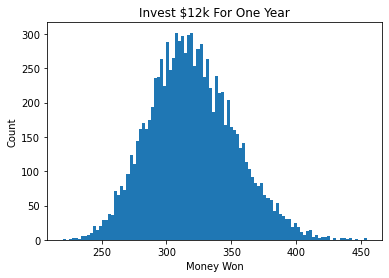

Expected average winnings of $328.25, or equivalent of 2.48%


In [72]:
experiment(Input_dollars, Input_weeks, compounding=Input_compounding)
plt.show()
print(
    'Expected average winnings of $' + str(round(invest(Input_dollars, Input_weeks, compounding=Input_compounding),2)) + 
', or equivalent of ' + str(round(invest(Input_dollars, Input_weeks, compounding=Input_compounding)/Input_dollars*100,2)) + '%'
)

In [73]:
winnings = []
for i in range(10000):
    winnings.append(invest(Input_dollars, Input_weeks, compounding=Input_compounding))
print(
    'Minimum winnings would be approximately ' + str(round(min(winnings),2)) + ', or approximately '
    + str(round(min(winnings)/Input_dollars*100,2)) + '%')

Minimum winnings would be approximately 221.35, or approximately 1.81%
